## installs and setup

In [5]:
# Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

In [6]:
plt.style.use('dark_background')
#resize plot to wide form
plt.rcParams['figure.figsize'] = [20, 4]
#shrink plot labels
plt.rcParams.update({'font.size': 12})
#remove all boundaries
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [7]:
#read in a csv file and returns the smoothed velocity and x values
def read_smooth_data(filename, smoothing):
    data = pd.read_csv(filename, delimiter = ',').dropna()
    vel = data["Velocity:0"].rolling(smoothing).mean()
    vel = vel / 5 #divide by five to normalize velocity ( 5 m/s is inlet velocity)
    x = data["Points:0"]
    return vel, x

In [8]:
#smooth data
smoothing = 75

vel_8_026,x_8_026 = read_smooth_data("extracts1/d8_026_000050.csv", smoothing)
vel_8_400,x_8_400 = read_smooth_data("extracts1/d8_400_000050.csv", smoothing)
vel_8_213,x_8_213 = read_smooth_data("extracts1/d8_213_000080.csv", smoothing)
vel_8_1195,x_8_1195 = read_smooth_data("extracts1/d8_1195_000080.csv", smoothing)
vel_8_3065,x_8_3065 = read_smooth_data("extracts1/d8_3065_000080.csv", smoothing)

vel_26_213, x_26_213 = read_smooth_data("extracts1/d26_213_000110.csv", smoothing)
vel_215_213, x_215_213 = read_smooth_data("extracts1/d215_213_000110.csv", smoothing)
vel_125_213, x_125_213 = read_smooth_data("extracts1/d125_213_000110.csv", smoothing)

vel_26_026, x_26_026 = read_smooth_data("extracts1/d26_026_000050.csv", smoothing)
vel_26_400, x_26_400 = read_smooth_data("extracts1/d26_400_000050.csv", smoothing)
vel_17_213, x_17_213 = read_smooth_data("extracts1/d17_213_000050.csv", smoothing)

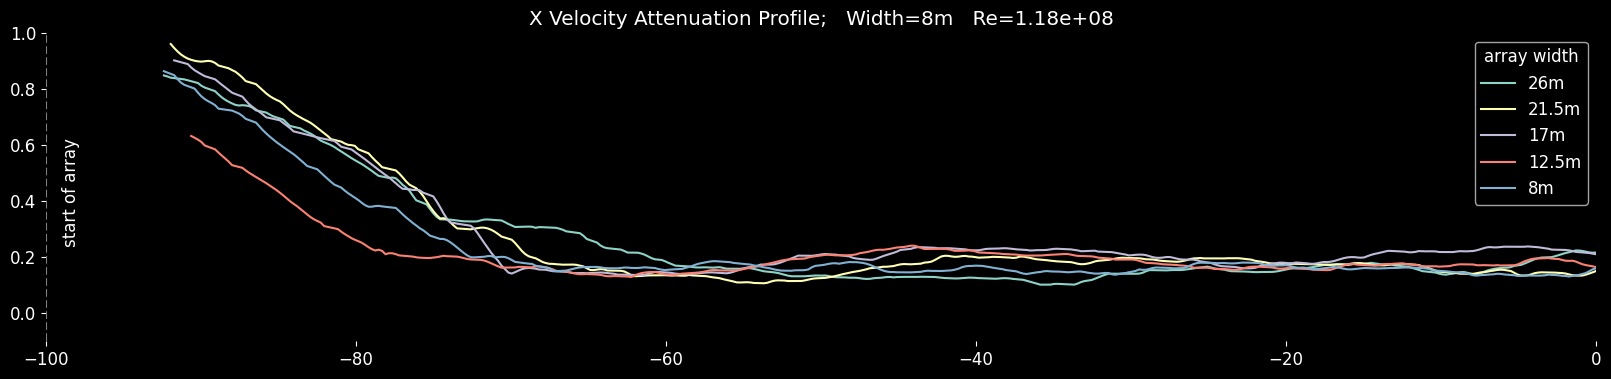

In [9]:
%matplotlib inline

plt.figure()
plt.plot( x_26_213,vel_26_213, label = '26m')
plt.plot( x_215_213,vel_215_213, label = '21.5m')
plt.plot( x_17_213,vel_17_213, label = '17m')
plt.plot( x_125_213,vel_125_213, label = '12.5m')
plt.plot( x_8_213,vel_8_213, label = '8m')

#lab flow Re is at 3,600,000
plt.title('X Velocity Attenuation Profile;   Width=8m   Re=1.18e+08')

#set plot limits
plt.xlim(-100, 0)
plt.ylim(-0.1, 1)

#add vertical line to note start of pole array
plt.axvline(x=-100, color='grey', linestyle='--')
plt.text(-99, 0.25, 'start of array', rotation=90)

plt.legend(title="array width")
plt.show()

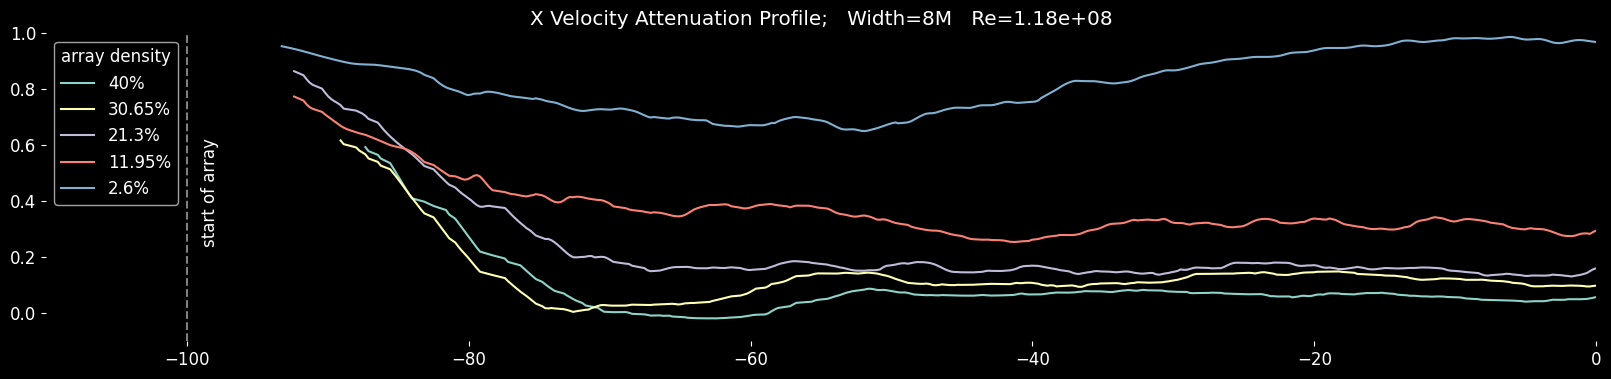

In [10]:
%matplotlib inline

plt.figure()
plt.plot( x_8_400,vel_8_400, label = '40%')
plt.plot( x_8_3065,vel_8_3065, label = '30.65%')
plt.plot( x_8_213,vel_8_213, label = '21.3%')
plt.plot( x_8_1195,vel_8_1195, label = '11.95%')
plt.plot( x_8_026,vel_8_026, label = '2.6%')

#lab flow Re is at 3,600,000
plt.title('X Velocity Attenuation Profile;   Width=8M   Re=1.18e+08')

#set plot limits
plt.xlim(-110, 0)
plt.ylim(-0.1, 1)

#add vertical line to note start of pole array
plt.axvline(x=-100, color='grey', linestyle='--')
plt.text(-99, 0.25, 'start of array', rotation=90)

plt.legend(title="array density")
plt.show()

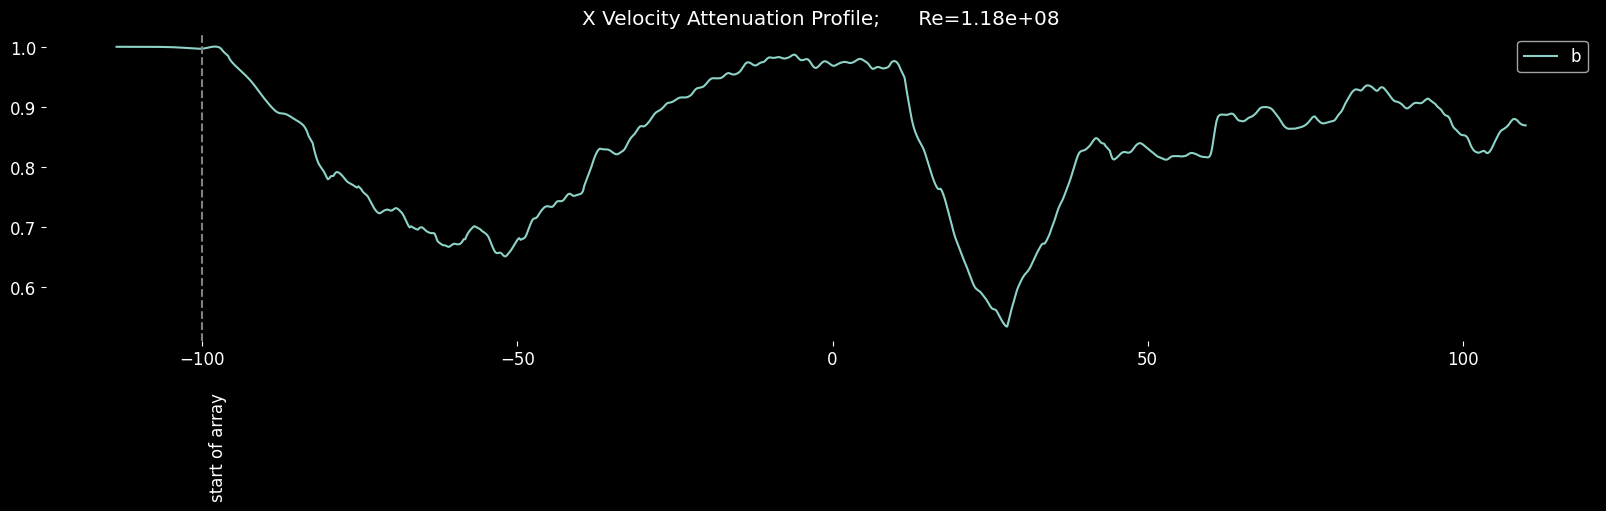

In [14]:
%matplotlib inline

vel_b, x_b = read_smooth_data("extracts1/d8_026_000050b.csv", smoothing)

plt.figure()
plt.plot( x_b,vel_b, label = 'b')
# plt.plot( x_26_400,vel_26_400, label = '26_400')
# plt.plot( x_17_213,vel_17_213, label = '17_213')

#add vertical line to note start of pole array
plt.axvline(x=-100, color='grey', linestyle='--')
plt.text(-99, 0.25, 'start of array', rotation=90)

#lab flow Re is at 3,600,000
plt.title('X Velocity Attenuation Profile;      Re=1.18e+08')
plt.legend()
plt.show()

In [12]:
#create a function that uses the significant size and velocity of a fluid to calculate the reynolds number  
def reynolds_number(velocity, diameter):
    #define a density and viscosity for salt water at 20 degrees celcius
    density = 1025 #kg/m^3
    viscosity = 0.001307 #Pa*s
    return (velocity * diameter * density) / viscosity

In [13]:
re = reynolds_number(5, 30)
#convert number to string in scientific notation
re = "{:.2e}".format(re)
re

'1.18e+08'